In [1]:
#
# Working through the example from
# https://github.com/kwmcbride/kipet/blob/new_data/kipet/new_examples/Ex_7_concentration_input.py
# Using dataset with no A (only B and C)
#

In [2]:
import sys
from kipet import KipetModel

import matplotlib.pyplot as plt

In [3]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('reaction-1')   

In [4]:
filename = '/home/paperspace/learn_kipet/data_sets/Ex_1_C_data_withoutA.csv'
r1.add_dataset('C_data', category='concentration', file=filename)

the dir is: /home/paperspace/learn_kipet/data_sets
/home/paperspace/learn_kipet/data_sets/Ex_1_C_data_withoutA.csv
read dir : /home/paperspace/learn_kipet/data_sets/Ex_1_C_data_withoutA.csv


In [5]:
r1.datasets['C_data'].data

,B,C
0.0000,0.000000,0.000013
0.0333,0.000002,0.000021
0.0667,0.000013,0.000018
0.1000,0.000025,0.000014
0.1334,0.000035,0.000012
...,...,...
9.8353,0.000043,0.000859
9.8686,0.000042,0.000857
9.9020,0.000041,0.000859
9.9353,0.000043,0.000860


In [6]:
# Add the model parameters
r1.add_parameter('k1', init=2.0, bounds=(0.0, 5.0))
r1.add_parameter('k2', init=0.2, bounds=(0.0, 2.0))

# Declare the components and give the initial values
r1.add_component('A', state='concentration', init=0.001)
r1.add_component('B', state='concentration', init=0.0)
r1.add_component('C', state='concentration', init=0.0)

In [7]:
# Define the reaction model
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs 

r1.add_equations(rule_odes)

In [8]:
# Settings
r1.settings.collocation.nfe = 60
# Run KIPET
r1.settings.solver.linear_solver = 'ma27'
r1.run_opt() 

0 9.9687
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
No variance information for A found, setting equal to unity
No variance information for B found, setting equal to unity
No 


RESULTS
Z:
                  A         B             C
0.000000  0.001000  0.000000  0.000000e+00
0.005163  0.000999  0.000001  3.056846e-09
0.021477  0.000995  0.000005  5.252556e-08
0.033300  0.000993  0.000007  1.256589e-07
0.038479  0.000991  0.000008  1.674229e-07
...            ...       ...           ...
9.923477  0.000108  0.000030  8.619748e-04
9.935300  0.000107  0.000030  8.623406e-04
9.940479  0.000107  0.000030  8.625005e-04
9.956841  0.000107  0.000030  8.630045e-04
9.968700  0.000107  0.000030  8.633686e-04

[898 rows x 3 columns]

Cm:
                B         C
0.0000  0.000000  0.000013
0.0333  0.000002  0.000021
0.0667  0.000013  0.000018
0.1000  0.000025  0.000014
0.1334  0.000035  0.000012
...          ...       ...
9.8353  0.000043  0.000859
9.8686  0.000042  0.000857
9.9020  0.000041  0.000859
9.9353  0.000043  0.000860
9.9687  0.000038  0.000863

[300 rows x 2 columns]

dZdt:
                  A         B         C
0.000000  0.000000  0.000000  0.000000
0.00516

In [9]:
# Display the results
r1.results.show_parameters


The estimated parameters are:
k1 0.22450247161155587
k2 1.0235716538545294


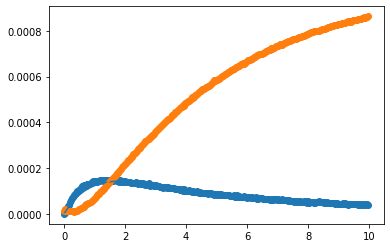

In [11]:
fig, ax = plt.subplots()
for c in ['A','B','C']:
    if c in r1.results.Cm.columns:
        ax.plot(r1.results.Z.index, r1.results.Z[c])
        ax.scatter(r1.results.Cm.index, r1.results.Cm[c])